<a href="https://colab.research.google.com/github/OsirisEscaL/Parkinson_Project/blob/main/Models01_Parkinson_HereditaryAtaxias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier


In [2]:
models = [
    ("Dummy Classifier", DummyClassifier(strategy="most_frequent", random_state = 42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state = 42)),
    ("SVM", SVC(random_state = 42)),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state = 42)),
    ("Random Forest", RandomForestClassifier(random_state = 42)),
    ("Extra Trees", ExtraTreesClassifier(random_state = 42)),
    ('Bagging', BaggingClassifier(random_state = 42)),
    ("AdaBoost", AdaBoostClassifier(random_state = 42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state = 42))
]

In [3]:
rng = np.random.default_rng(seed=42)
random = rng.integers(10000, size=50)

In [4]:
ds = pd.read_csv('Parkinson_HeredetaryAtaxias.csv')
ds = ds.drop(['Unnamed: 0'], axis=1)
X = ds.iloc[:, 0:-1].values
y = ds.iloc[:, -1].values

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [5]:
results = {}
results_raw = {}

for model_name, model in models:
    modelaccuracy = []
    modelprecision = []
    modelsensitivity = []
    modelspecificity = []
    modelbalanced_accuracy = []
    modelf1 = []
    modelroc_auc = []
    for num in random:
        skfaccuracy = []
        skfprecision = []
        skfsensitivity = []
        skfspecificity = []
        skfbalanced_accuracy = []
        skff1 = []
        skfroc_auc = []
        stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = num)
        for train_index, test_index in stratified_kfold.split(scaled_X, y):
            X_train, X_test = scaled_X[train_index], scaled_X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            sensitivity = recall_score(y_test, y_pred, average='binary', pos_label=1)
            specificity = recall_score(y_test, y_pred, average='binary', pos_label=0)
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            skfaccuracy.append(accuracy)
            skfprecision.append(precision)
            skfsensitivity.append(sensitivity)
            skfspecificity.append(specificity)
            skfbalanced_accuracy.append(balanced_accuracy)
            skff1.append(f1)
            skfroc_auc.append(roc_auc)
        modelaccuracy.append(np.mean(skfaccuracy))
        modelprecision.append(np.mean(skfprecision))
        modelsensitivity.append(np.mean(skfsensitivity))
        modelspecificity.append(np.mean(skfspecificity))
        modelbalanced_accuracy.append(np.mean(skfbalanced_accuracy))
        modelf1.append(np.mean(skff1))
        modelroc_auc.append(np.mean(skfroc_auc))
    mean_accuracy = np.mean(modelaccuracy)
    mean_precision = np.mean(modelprecision)
    mean_sensitivity = np.mean(modelsensitivity)
    mean_specificity = np.mean(modelspecificity)
    mean_balanced_accuracy = np.mean(modelbalanced_accuracy)
    mean_f1 = np.mean(modelf1)
    mean_roc_auc = np.mean(modelroc_auc)
    std_accuracy = np.std(modelaccuracy)
    std_precision = np.std(modelprecision)
    std_sensitivity = np.std(modelsensitivity)
    std_specificity = np.std(modelspecificity)
    std_balanced_accuracy = np.std(modelbalanced_accuracy)
    std_f1 = np.std(modelf1)
    std_roc_auc = np.std(modelroc_auc)
    results_raw[model_name] = {'Balanced_Accuracy': modelbalanced_accuracy,
                               'Accuracy': modelaccuracy,
                               'Precision': modelprecision,
                               'Sensitivity': modelsensitivity,
                               'Specificity': modelspecificity,
                               'F1': modelf1,
                               'ROC_AUC': modelroc_auc}
    results[model_name] = {'Mean_Balanced_Accuracy': mean_balanced_accuracy, 'Std_Balanced_Accuracy': std_balanced_accuracy,
                           'Mean_Accuracy': mean_accuracy, 'Std_Accuracy': std_accuracy,
                           'Mean_Precision': mean_precision, 'Std_Precision': std_precision,
                           'Mean_Sensitivity': mean_sensitivity, 'Std_Sensitivity': std_sensitivity,
                           'Mean_Specificity': mean_specificity, 'Std_Specificity': std_specificity,
                           'Mean_F1': mean_f1, 'Std_F1': std_f1,
                           'Mean_ROC_AUC': mean_roc_auc, 'Std_ROC_AUC': std_roc_auc}



In [6]:
results_raw_ds = pd.DataFrame(results_raw)
results_raw_ds.to_csv('Results_Raw_Model01_Parkinson_HeredetaryAtaxias.csv')
results_raw_ds

,Dummy Classifier,Logistic Regression,SVM,KNN,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Bagging,AdaBoost,Gradient Boosting
Balanced_Accuracy,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.6110606060606061, 0.4556060606060607, 0.523...","[0.5, 0.5, 0.5, 0.4909090909090909, 0.5, 0.5, ...","[0.5151515151515151, 0.4909090909090909, 0.490...","[0.5196969696969698, 0.4706060606060606, 0.451...","[0.523939393939394, 0.44378787878787884, 0.339...","[0.5725757575757575, 0.4868181818181818, 0.515...","[0.5142424242424243, 0.4618181818181818, 0.481...","[0.4909090909090909, 0.4787878787878788, 0.494...","[0.5253030303030302, 0.4790909090909091, 0.500...","[0.5718181818181819, 0.4878787878787879, 0.465..."
Accuracy,"[0.7571428571428572, 0.7571428571428572, 0.757...","[0.7571428571428571, 0.6285714285714287, 0.671...","[0.7571428571428572, 0.7571428571428572, 0.757...","[0.7428571428571429, 0.7428571428571429, 0.742...","[0.6428571428571428, 0.6285714285714286, 0.585...","[0.6714285714285715, 0.6142857142857142, 0.514...","[0.7714285714285714, 0.7142857142857143, 0.742...","[0.7428571428571429, 0.7, 0.7285714285714286, ...","[0.7, 0.6428571428571429, 0.6857142857142857, ...","[0.7, 0.6285714285714286, 0.6714285714285715, ...","[0.7571428571428571, 0.6571428571428573, 0.642..."
Precision,"[0.7571428571428572, 0.7571428571428572, 0.757...","[0.8043589743589743, 0.7388888888888888, 0.770...","[0.7571428571428572, 0.7571428571428572, 0.757...","[0.7626373626373627, 0.7538461538461539, 0.753...","[0.7602797202797204, 0.7494716394716395, 0.734...","[0.77, 0.7277855477855478, 0.6766666666666666,...","[0.7853479853479854, 0.7532967032967033, 0.762...","[0.7622710622710622, 0.7417582417582418, 0.750...","[0.7535864135864137, 0.745967365967366, 0.7567...","[0.7646853146853146, 0.7524242424242426, 0.758...","[0.7834165834165834, 0.7508158508158508, 0.744..."
Sensitivity,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9054545454545455, 0.7945454545454546, 0.812...","[1.0, 1.0, 1.0, 0.9818181818181818, 1.0, 1.0, ...","[0.9636363636363636, 0.9818181818181818, 0.981...","[0.7727272727272727, 0.7745454545454545, 0.72,...","[0.8145454545454547, 0.7709090909090909, 0.679...","[0.9618181818181817, 0.9236363636363636, 0.963...","[0.9618181818181817, 0.9236363636363636, 0.963...","[0.8818181818181818, 0.790909090909091, 0.8727...","[0.8672727272727274, 0.7581818181818182, 0.834...","[0.9436363636363637, 0.809090909090909, 0.8145..."
Specificity,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.31666666666666665, 0.11666666666666665, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.05...","[0.26666666666666666, 0.16666666666666666, 0.1...","[0.2333333333333333, 0.11666666666666665, 0.0,...","[0.18333333333333332, 0.05, 0.0666666666666666...","[0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.05...","[0.1, 0.16666666666666666, 0.11666666666666665...","[0.18333333333333332, 0.2, 0.16666666666666666...","[0.2, 0.16666666666666666, 0.11666666666666665..."
F1,"[0.8613333333333333, 0.8613333333333333, 0.861...","[0.8488330510069642, 0.7621343873517786, 0.788...","[0.8613333333333333, 0.8613333333333333, 0.861...","[0.8499999999999999, 0.852, 0.852, 0.841855072...","[0.7631018257105213, 0.7582473971489989, 0.719...","[0.7885563711650668, 0.7472463768115942, 0.675...","[0.8636811594202898, 0.8294914361001318, 0.849...","[0.8491014492753622, 0.822376811594203, 0.8426...","[0.811047619047619, 0.7662939958592132, 0.8060...","[0.8117918313570487, 0.7534048560135517, 0.789...","[0.8534914361001317, 0.7767769225435129, 0.773..."
ROC_AUC,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.6110606060606061, 0.4556060606060607, 0.523...","[0.5, 0.5, 0.5, 0.4909090909090909, 0.5, 0.5, ...","[0.5151515151515152, 0.4909090909090909, 0.490...","[0.5196969696969698, 0.4706060606060606, 0.451...","[0.523939393939394, 0.44378787878787884, 0.339...","[0.5725757575757576, 0.4868181818181818, 0.515..."

In [7]:
results_ds = pd.DataFrame(results).T
results_ds.to_csv('Results_Model01_Parkinson_HeredetaryAtaxias.csv')
results_ds

,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
Dummy Classifier,0.500000,0.000000,0.757143,1.110223e-16,0.757143,1.110223e-16,1.000000,0.000000,0.000000,0.000000,0.861333,1.110223e-16,0.500000,0.000000
Logistic Regression,0.549758,0.055173,0.693429,4.112797e-02,0.783009,2.716286e-02,0.830182,0.041455,0.269333,0.098396,0.801013,2.905041e-02,0.549758,0.055173
SVM,0.499818,0.001273,0.756857,2.000000e-03,0.757077,4.615385e-04,0.999636,0.002545,0.000000,0.000000,0.861147,1.306667e-03,0.499818,0.001273
KNN,0.487567,0.017287,0.729429,1.411614e-02,0.752201,7.061483e-03,0.958800,0.016812,0.016333,0.030820,0.841881,9.368432e-03,0.487567,0.017287
Naive Bayes,0.482318,0.036335,0.623429,3.267153e-02,0.747965,1.891749e-02,0.759636,0.039402,0.205000,0.059838,0.748098,2.638242e-02,0.482318,0.036335
Decision Tree,0.501852,0.051839,0.631714,4.326379e-02,0.756746,2.665956e-02,0.756036,0.051107,0.247667,0.093274,0.750580,3.489262e-02,0.501852,0.051839
Random Forest,0.506915,0.026157,0.724571,1.938651e-02,0.759864,1.146954e-02,0.931164,0.020178,0.082667,0.046899,0.834812,1.354688e-02,0.506915,0.026157
Extra Trees,0.483097,0.025125,0.713429,1.793640e-02,0.750501,1.113190e-02,0.931527,0.016507,0.034667,0.044076,0.829370,1.164422e-02,0.483097,0.025125
Bagging,0.511318,0.041213,0.680286,3.415332e-02,0.762227,2.000681e-02,0.839636,0.043219,0.183000,0.078633,0.794804,2.626329e-02,0.511318,0.041213
AdaBoost,0.501142,0.042593,0.668000,3.731389e-02,0.757896,2.031090e-02,0.826618,0.049322,0.175667,0.078825,0.786211,2.894602e-02,0.501142,0.042593


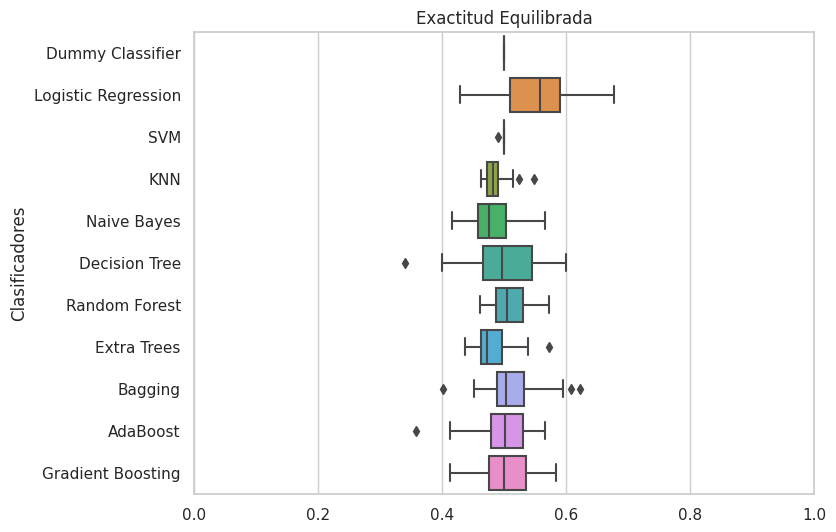

In [8]:
balanced_accuracy = pd.DataFrame(results_raw_ds.loc['Balanced_Accuracy'])
modelos = balanced_accuracy.index

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=balanced_accuracy['Balanced_Accuracy'], orient='h')
plt.title('Exactitud Equilibrada')
plt.xlim(0, 1)
plt.ylabel('Clasificadores')
plt.gca().set_yticklabels(modelos)
plt.savefig('Boxplot_Model01_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

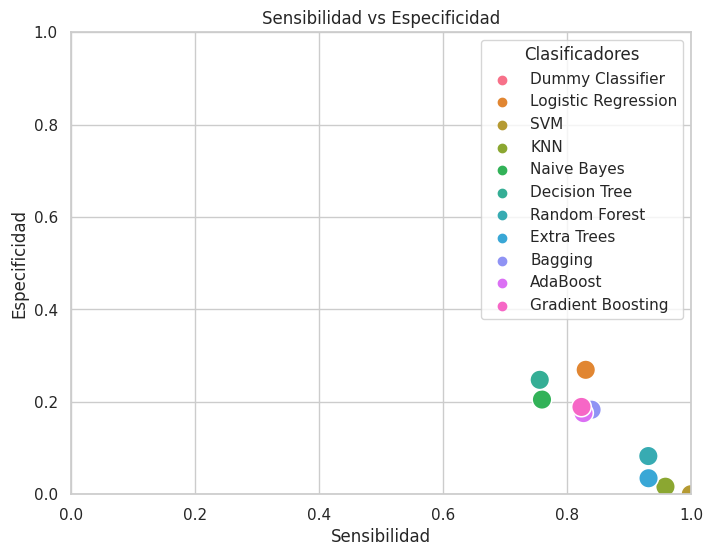

In [9]:
modelos = results_ds.index
results_ds.insert(0, 'Clasificadores', modelos)

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x='Mean_Sensitivity', y='Mean_Specificity', data=results_ds, hue = 'Clasificadores', s=200)
plt.title('Sensibilidad vs Especificidad')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Sensibilidad')
plt.ylabel('Especificidad')
plt.savefig('Scatterplot_Model01_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()